In [80]:
import pandas as pd

# Load the CSV file
file_path = 'Credit_score.csv'
df = pd.read_csv(file_path)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [82]:
# Fill missing names using forward fill and backward fill within each 'Customer_ID'
df['Name'] = df.groupby('Customer_ID', group_keys=False)['Name'].apply(lambda x: x.ffill().bfill())


In [83]:
# Step 1: Replace non-numeric and negative values with NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # Convert to numeric
df['Age'] = df['Age'].where(df['Age'] >= 0)  # Keep only non-negative ages; others become NaN

# Step 2: Define a function to fill the age based on mode
def fill_age_with_mode(group):
    # Calculate mode of valid ages (ignoring NaN)
    mode_age = group.mode()
    if not mode_age.empty:
        mode_age_value = mode_age[0]  # Get the first mode value
        return group.fillna(mode_age_value)  # Fill NaN with the mode
    return group  # If there's no mode, return the group unchanged

# Step 3: Apply the mode filling within each Customer_ID group
df['Age'] = df.groupby('Customer_ID', group_keys=False)['Age'].apply(fill_age_with_mode)

In [84]:
# Step 1: Replace non-numeric and negative values with NaN
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')  # Convert to numeric
# df['Annual_Income'] = df['Age'].where(df['Age'] >= 0)  # Keep only non-negative ages; others become NaN

# Step 2: Define a function to fill the age based on mode
def fill_annual_income_with_mode(group):
    # Calculate mode of valid ages (ignoring NaN)
    mode_income = group.mode()
    if not mode_income.empty:
        mode_income_value = mode_income[0]  # Get the first mode value
        return group.fillna(mode_income_value)  # Fill NaN with the mode
    return group  # If there's no mode, return the group unchanged

# Step 3: Apply the mode filling within each Customer_ID group
df['Annual_Income'] = df.groupby('Customer_ID', group_keys=False)['Annual_Income'].apply(fill_annual_income_with_mode)

In [85]:
# Step 1: Replace non-numeric and negative values with NaN
df['Monthly_Inhand_Salary'] = pd.to_numeric(df['Monthly_Inhand_Salary'], errors='coerce')  # Convert to numeric
# df['Annual_Income'] = df['Age'].where(df['Age'] >= 0)  # Keep only non-negative ages; others become NaN

# Step 2: Define a function to fill the age based on mode
def fill_monthly_income_with_mode(group):
    # Calculate mode of valid ages (ignoring NaN)
    mode_income = group.mode()
    if not mode_income.empty:
        mode_income_value = mode_income[0]  # Get the first mode value
        return group.fillna(mode_income_value)  # Fill NaN with the mode
    return group  # If there's no mode, return the group unchanged

# Step 3: Apply the mode filling within each Customer_ID group
df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID', group_keys=False)['Monthly_Inhand_Salary'].apply(fill_monthly_income_with_mode)

In [86]:
# Step 1: Remove underscores and convert to integers
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_', '', regex=False)  # Remove underscores

# Step 2: Convert to numeric and handle errors
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')  # Convert to numeric
# Step 3: Fill NaN values with 0
df['Num_of_Delayed_Payment'].fillna(0, inplace=True)
# Step 3: Replace negative values with positive values
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].abs()  # Take absolute values

In [87]:
import pandas as pd


# Step 1: Replace '_' with 'Unspecified'
df['Credit_Mix'] = df['Credit_Mix'].replace('_', 'Unspecified')

# Step 2: Fill NaN values with 'Unspecified'
df['Credit_Mix'].fillna('Unspecified', inplace=True)

In [88]:
df['Occupation'] = df.groupby('Customer_ID', group_keys=False)['Occupation'].apply(lambda x: x.ffill().bfill())

In [89]:
# Step 1: Remove underscores and convert to integers
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '', regex=False)  # Remove underscores

# Step 2: Convert to numeric and handle errors
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')  # Convert to numeric
# Step 3: Fill NaN values with 0
df['Outstanding_Debt'].fillna(0, inplace=True)
# Step 3: Replace negative values with positive values
df['Outstanding_Debt'] = df['Outstanding_Debt'].abs()  # Take absolute values

In [90]:
# Step 1: Replace unwanted values with 'Unspecified_spent_Unspecified_value_payments'
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace({'': 'Unspecified_spent_Unspecified_value_payments', '!@9#%8': 'Unspecified_spent_Unspecified_value_payments'})

# Step 2: Fill NaN values with 'Unspecified_spent_Unspecified_value_payments'
df['Payment_Behaviour'].fillna('Unspecified_spent_Unspecified_value_payments', inplace=True)


In [91]:
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')
df['Amount_invested_monthly'].fillna('Unspecified', inplace=True)

In [92]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
df['Num_of_Delayed_Payment'].fillna(0, inplace=True)
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].abs()

In [93]:
df['Num_Credit_Inquiries'].fillna(0,inplace=True)

In [94]:
# Step 1: Remove underscores and convert to integers
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_', '', regex=False)  # Remove underscores

# Step 2: Convert to numeric and handle errors
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')  # Convert to numeric
# Step 3: Fill NaN values with 0
df['Num_of_Loan'].fillna(0, inplace=True)
# Step 3: Replace negative values with positive values
df['Num_of_Loan'] = df['Num_of_Loan'].abs()  # Take absolute values

In [95]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce') 
df['Monthly_Balance'].fillna(0,inplace=True)

In [96]:
# Step 1: Remove underscores and convert to integers
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].str.replace('_', '', regex=False)  # Remove underscores

# Step 2: Convert to numeric and handle errors
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')  # Convert to numeric
# Step 3: Fill NaN values with 0
df['Changed_Credit_Limit'].fillna(0, inplace=True)

In [97]:
df['Type_of_Loan'].fillna('Not Specified',inplace = True)

In [98]:
df['Credit_History_Age'].fillna('NA',inplace =True)

In [99]:
# Step 1: Replace 'and' with ',' and split 'Type_of_Loan' into individual loans
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace('and', ',')
df['Type_of_Loan_Split'] = df['Type_of_Loan'].str.split(',')

# Step 2: Get unique loan types
all_loan_types = set(df['Type_of_Loan_Split'].explode().str.strip())

# Step 3: Create columns for each loan type and mark with 1 or 0
for loan_type in all_loan_types:
    df[loan_type] = df['Type_of_Loan_Split'].apply(lambda x: 1 if loan_type in [i.strip() for i in x] else 0)

# Drop the temporary split column
df.drop(columns=['Type_of_Loan_Split'], inplace=True)

# Step 4: Apply the rule that if any loan type has a 1, 'Not Specified' must be 0
loan_type_columns = [col for col in df.columns if col != 'Not Specified']

# Set 'Not Specified' to 0 if any other loan type column has a 1
df['Not Specified'] = df.apply(lambda row: 0 if any(row[loan_type_columns] == 1) else row['Not Specified'], axis=1)


In [100]:
df.drop(columns=[''], inplace=True)

# CONVERTING CREDIT HISTORY AGE TO MONTHS FOR NUMERICAL ANALYSIS

In [101]:
import numpy as np
# Step 1: Define a function to convert the "Years and Months" format to total months
def convert_to_months(value):
    if pd.isna(value) or value == 'NA':
        return np.nan  # Return NA for 'NA' values
    
    # Try to split the value and extract years and months
    try:
        years = int(value.split(' Years and ')[0].strip())
        months = int(value.split(' Years and ')[1].replace(' Months', '').strip())
        return years * 12 + months  # Convert to total months
    except:
        return np.nan  # In case of any error, return NaN

# Step 2: Apply the conversion function to the 'Credit_History_Age' column
df['Credit_History_Months'] = df['Credit_History_Age'].apply(convert_to_months)


In [102]:
df['Credit_History_Months'].dropna()

0        265.0
2        267.0
3        268.0
4        269.0
5        270.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Months, Length: 90970, dtype: float64

# SPILTTING PAYMENT BEHAVIOUR INTO SPENT AND PAYMENTS

In [103]:
# Step 1: Split the 'Payment_Behaviour' column into three parts
df[['Expenditure', 'Value_of_Payments']] = df['Payment_Behaviour'].str.split('_spent_', expand=True)

# Step 2: Further split 'Value_of_Payments' column to extract the actual payment size
df['Value_of_Payments'] = df['Value_of_Payments'].str.split('_value_payments').str[0]


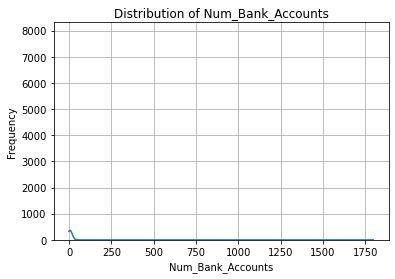

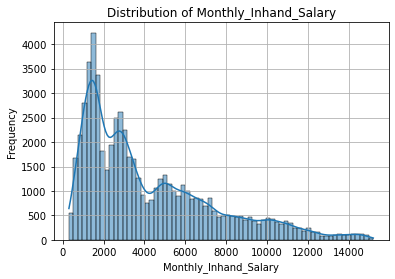

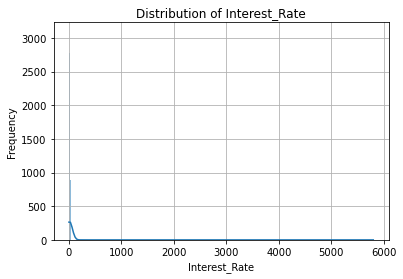

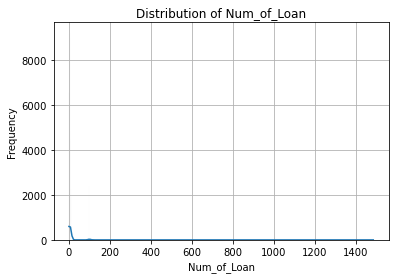

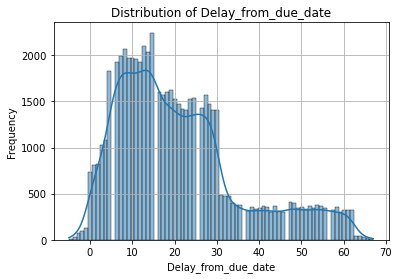

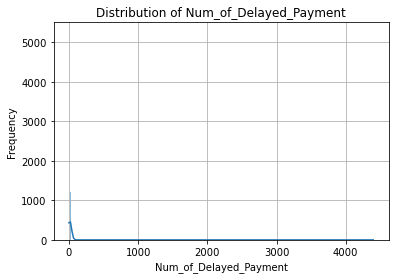

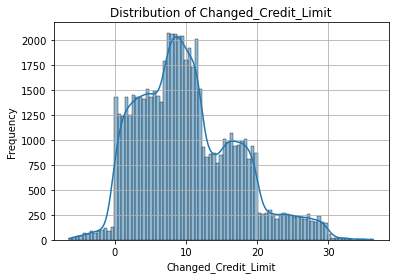

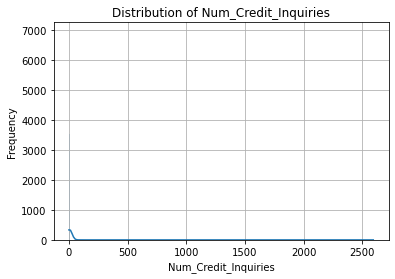

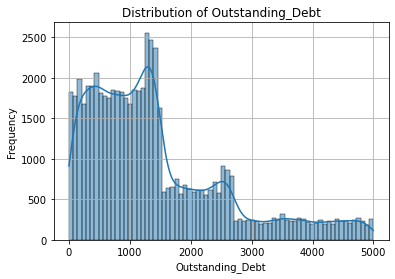

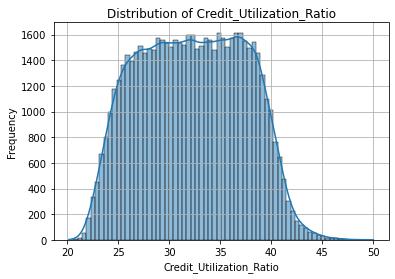

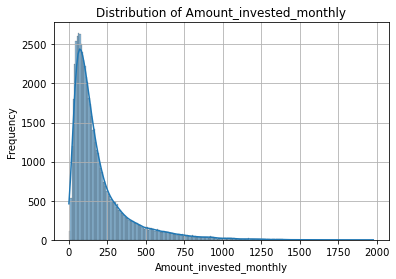

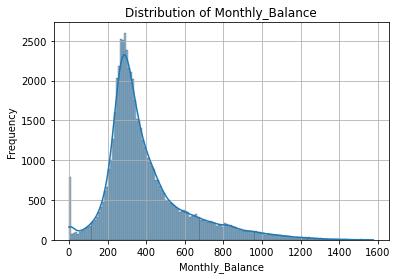

In [104]:
import matplotlib.pyplot as plt 
import seaborn as sns


# Step 1: Make a copy of the DataFrame to avoid modifying the original
df_copy = df.copy()

# Step 2: Replace 'NA' and 'Unspecified' with NaN
df_copy.replace(['NA', 'Unspecified'], pd.NA, inplace=True)

grouped_df = df_copy.groupby('Customer_ID').apply(lambda group: group.dropna())

# Step 3: Iterate through each column and plot for each customer_id
for col in [ 'Num_Bank_Accounts', 'Monthly_Inhand_Salary',

'Interest_Rate', 'Num_of_Loan',

'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',

'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
'Amount_invested_monthly', 'Monthly_Balance']:
    if col != 'Customer_ID': # Skip the Customer_ID column
    # Try to convert column to numeric, errors='coerce' will turn non-numeric values to Na
        numeric_col = pd.to_numeric(grouped_df[col], errors='coerce')

        # Check if the column has any numeric data
        if numeric_col.notna().any(): 
            plt.figure(figsize=(6, 4))
            sns.histplot(numeric_col.dropna(), kde=True) # Plot histogram with KDE
            plt.title(f"Distribution of {col}") 
            plt.xlabel(col) 
            plt.ylabel('Frequency') 
            plt.grid(True)
            plt.show()


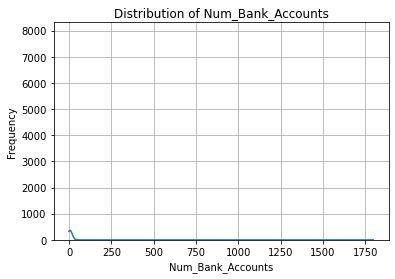

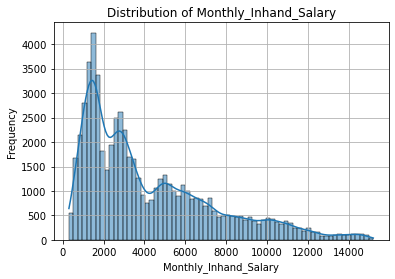

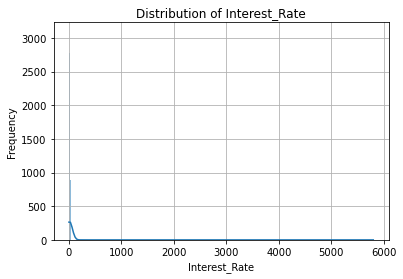

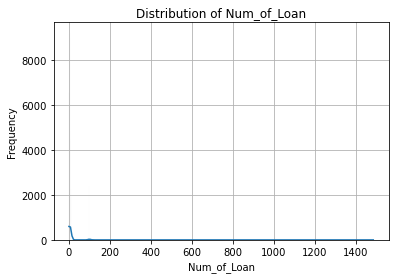

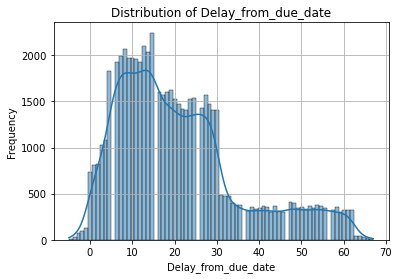

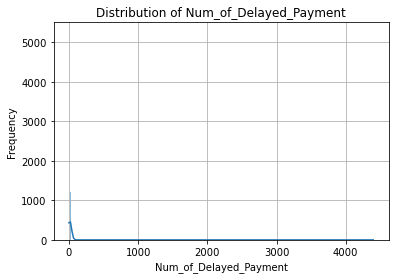

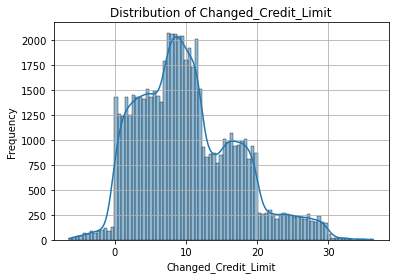

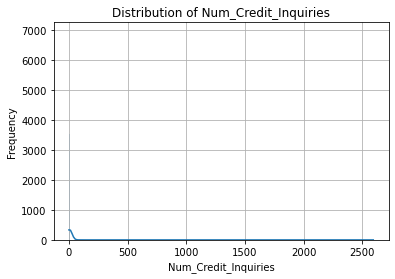

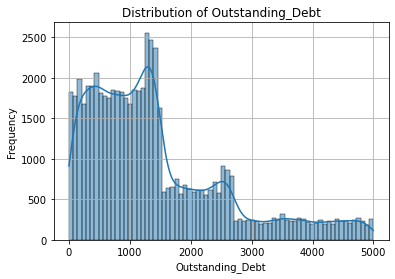

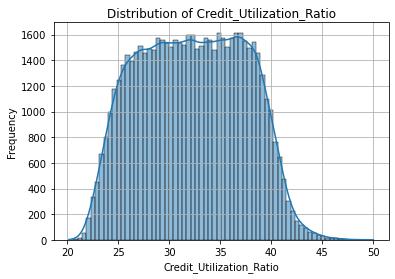

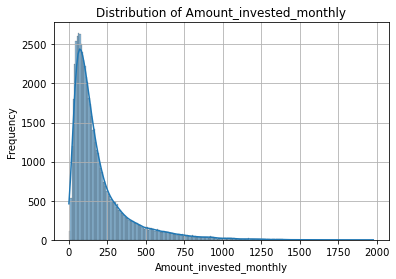

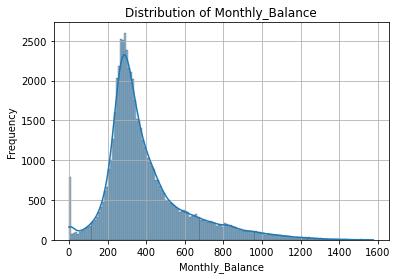

In [105]:
import matplotlib.pyplot as plt

import seaborn as sns


# Step 1: Make a copy of the DataFrame to avoid modifying the original
df_copy = df.copy()

# Step 2: Replace 'NA' and 'Unspecified' with NaN
df_copy.replace(['NA', 'Unspecified'], pd.NA, inplace=True)

grouped_df = df_copy.groupby('Customer_ID').apply(lambda group: group.dropna())

# Step 3: Iterate through each column and plot for each customer_id
for col in [ 'Num_Bank_Accounts', 'Monthly_Inhand_Salary',

'Interest_Rate', 'Num_of_Loan',

'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',

'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
'Amount_invested_monthly', 'Monthly_Balance']:
    if col != 'Customer_ID': # Skip the Customer_ID column
        # Try to convert column to numeric, errors='coerce' will turn non-numeric values to Na
        numeric_col = pd.to_numeric(grouped_df[col], errors='coerce')

        # Check if the column has any numeric data
        if numeric_col.notna().any(): 
            plt.figure(figsize=(6, 4))
            sns.histplot(numeric_col.dropna(), kde=True) # Plot histogram with KDE
            plt.title(f"Distribution of {col}")
            plt.xlabel(col) 
            plt.ylabel('Frequency') 

            plt.grid(True)
            plt.show()


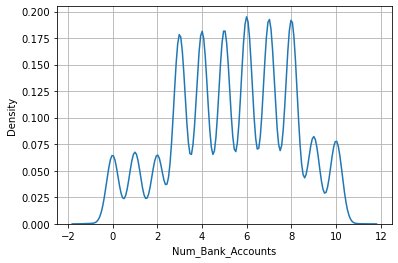

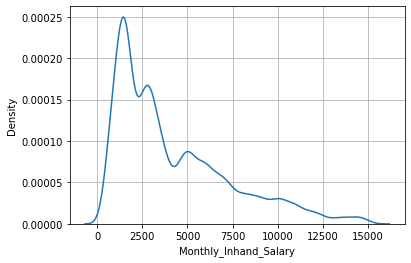

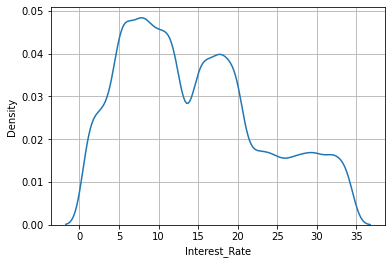

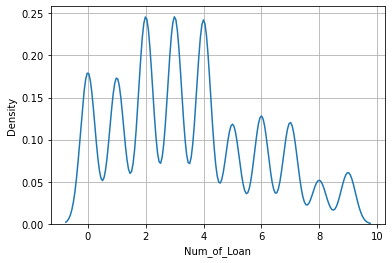

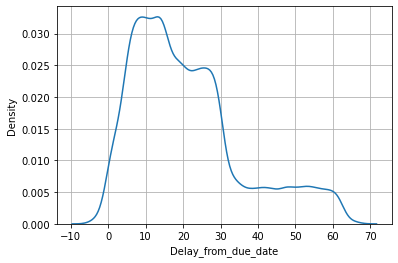

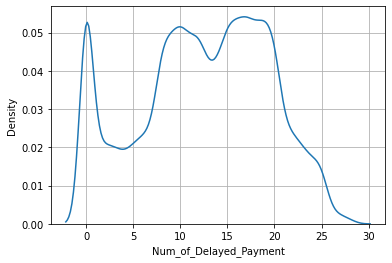

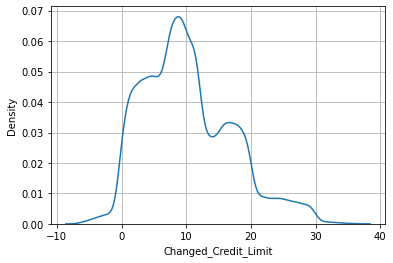

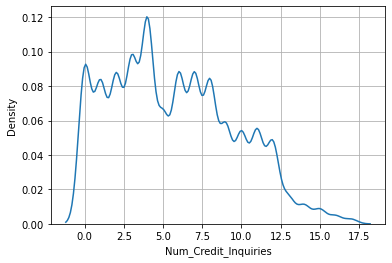

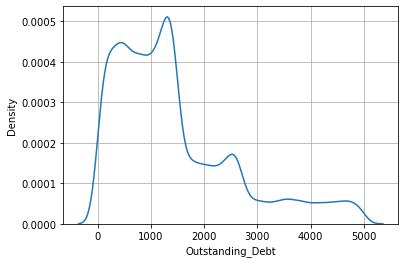

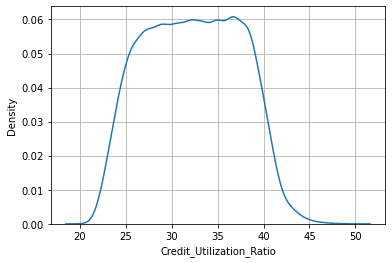

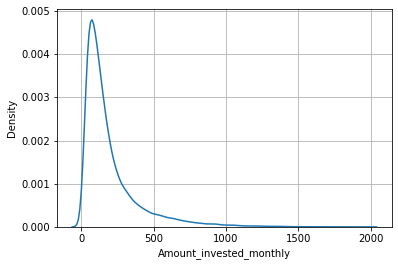

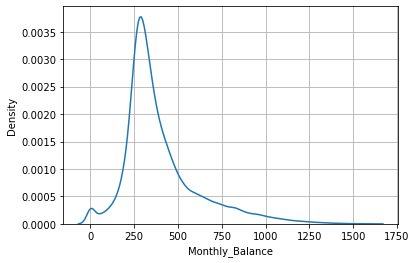

In [106]:
# Step 2: Define columns that are skewed and need outlier removal
columns_to_clean = [ 'Num_Bank_Accounts', 'Interest_Rate',
'Num_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',]

# Step 3: Remove outliers using the IQR method for each of the identified columns
def remove_outliers(df, columns): 
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25) 
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1 # Interquartile range

        # Define the acceptable range lower_bound = Q1 - 1.5 * IQR upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR 
        upper_bound = Q3 + 1.5 * IQR

    # Remove outliers (those outside the lower and upper bounds)
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)] 
    return df
# Remove outliers from the specified columns
df_cleaned = remove_outliers(df, columns_to_clean)

# Step 4: Group by Customer_ID and drop rows with NaN before plotting
grouped_df = df_cleaned.groupby('Customer_ID').apply(lambda group: group.dropna())

# Step 5: Iterate through each column and plot KDE for each customer_id
for col in ['Num_Bank_Accounts', 'Monthly_Inhand_Salary','Interest_Rate','Num_of_Loan',
            'Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit',
            'Num_Credit_Inquiries','Outstanding_Debt', 'Credit_Utilization_Ratio',
            'Credit_History_Age','Amount_invested_monthly','Monthly_Balance']:
    if col != 'Customer_ID': # Skip the Customer_ID column
    # Try to convert column to numeric, errors='coerce' will turn non-numeric values to Na
        numeric_col = pd.to_numeric(grouped_df[col], errors='coerce')

        # Check if the column has any numeric data
        if numeric_col.notna().any(): 
            plt.figure(figsize=(6, 4))
            sns.kdeplot(numeric_col.dropna()) # Plot KDE plot plt.title(f"Distribution of {col} (after outlier removal)") plt.xlabel(col)
            plt.ylabel('Density') 
            plt.grid(True) 
            plt.show()


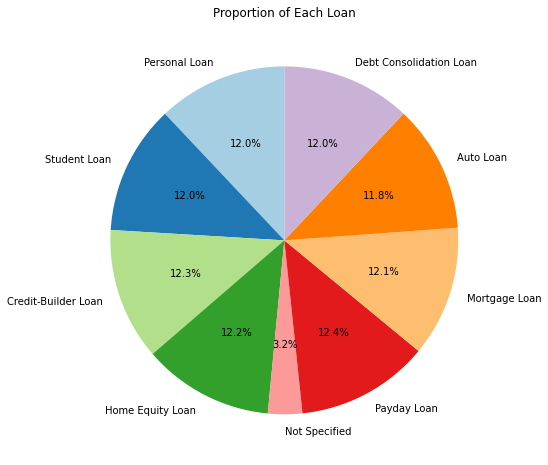

In [107]:
# Assuming df is your dataframe, and columns_with_1s is the list of columns with only 1 or 0 v

type_of_loans = ['Personal Loan', 'Student Loan', 'Credit-Builder Loan', 'Home Equity Loan',
'Not Specified', 'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Debt Consolidation Loan'] # R

# Step 1: Calculate the count of 1s for each column
count_1s = df[type_of_loans].apply(lambda col: (col == 1).sum())

# Step 3: Plot Pie Chart (Optional)
plt.figure(figsize=(8, 8))
count_1s.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Proportion of Each Loan')
plt.ylabel('') # Remove default y-axis label for pie chart
plt.show()


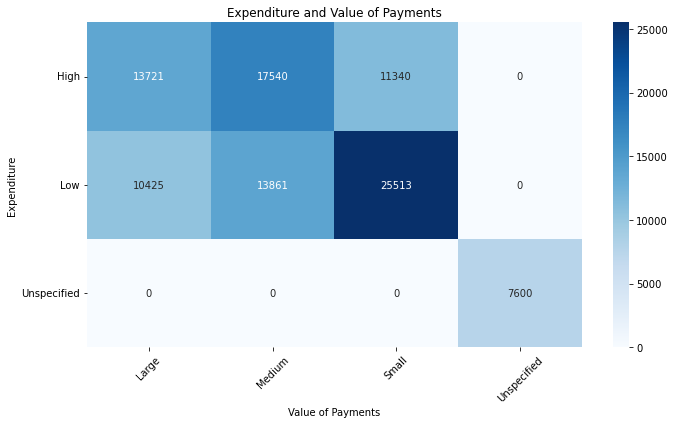

In [108]:
# Step 1: Convert 'Expenditure' and 'Value_of_Payments' to categorical columns

df['Expenditure'] = df['Expenditure'].astype('category')
df['Value_of_Payments'] = df['Value_of_Payments'].astype('category')

# Step 2: Create a crosstab between 'Expenditure' and 'Value_of_Payments'
crosstab_result = pd.crosstab(df['Expenditure'], df['Value_of_Payments'])

# Step 3: Visualize the crosstab result using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_result, annot=True, fmt="d", cmap='Blues', cbar=True)

# Customizing the plot
plt.title('Expenditure and Value of Payments')
plt.xlabel('Value of Payments')
plt.ylabel('Expenditure')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


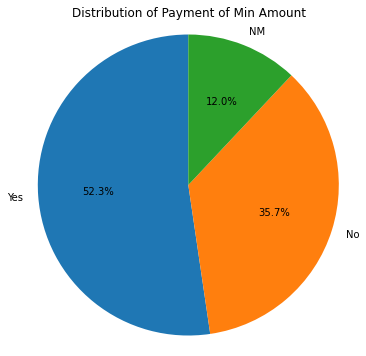

In [109]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].astype('category')
# Step 1: Get the value counts of the 'Payment_of_Min_Amount' column
payment_counts = df['Payment_of_Min_Amount'].value_counts()
# Step 2: Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=90)
# Step 3: Customizing the pie chart
plt.title('Distribution of Payment of Min Amount')
plt.axis('equal') # Equal aspect ratio ensures that the pie chart is drawn as a circle.
# Show the plot
plt.show()


# EDA-INSIGHTS

1.	Most credit transaction have resulted in Minimum amount being piad.
2.	Of available data, Most credit card transactiona are high expenditure and repaid in small payment
3.	Loans are qually divinde around 12% for most categories with Payday Loan being highest at 12.4
4.	Most of Customer acheive 25-40% of credit utilization.
5.	Number of Bank Accounts largely vary between 3 to 8.


# CREDIT SCORING

I have considered annual income , credit utilization ratio, and credit history age as positive factors for credit calculation. 'Number of loans, Number of delayed payments, Outstanding debts and payment of minim as negative factors.

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        100000 non-null  object  
 1   Customer_ID               100000 non-null  object  
 2   Month                     100000 non-null  object  
 3   Name                      100000 non-null  object  
 4   Age                       100000 non-null  float64 
 5   SSN                       100000 non-null  object  
 6   Occupation                100000 non-null  object  
 7   Annual_Income             100000 non-null  float64 
 8   Monthly_Inhand_Salary     100000 non-null  float64 
 9   Num_Bank_Accounts         100000 non-null  int64   
 10  Num_Credit_Card           100000 non-null  int64   
 11  Interest_Rate             100000 non-null  int64   
 12  Num_of_Loan               100000 non-null  int64   
 13  Type_of_Loan              1000

In [111]:
# Convert necessary columns to numeric, forcing errors to NaN
numeric_columns = ['Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
'Changed_Credit_Limit', 'Outstanding_Debt',
'Credit_Utilization_Ratio', 'Credit_History_Age']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
# Function to calculate the hypothetical credit score
def calculate_credit_score(group):
    score = 0
    # Scoring logic
    score += group['Annual_Income'].mean()	# Example: Adjust income (weights can be changed)
    score += (100 - group['Num_of_Loan'].mean() * 10) # Subtract loans, scale appropriately
    score += (100 - group['Num_of_Delayed_Payment'].mean() * 20) # Subtract delays, scale app
    score += group['Changed_Credit_Limit'].mean() # Add positive limit changes
    score += (100 - (group['Outstanding_Debt'].mean())) # Less debt is better, scale appropri
    score += (100 - group['Credit_Utilization_Ratio'].mean() * 100) # Lower utilization is be
    score += (group['Credit_History_Months'].mean() ) # More history is better

    # Adjust score for Payment_of_Min_Amount
    if group['Payment_of_Min_Amount'].str.contains('Yes').any():
        score -= 15 # Increase penalty if minimum payment was made
    return score # Return raw score
# Group by Customer_ID and calculate the raw score
df['Raw_Score'] = df.groupby('Customer_ID').apply(calculate_credit_score).reset_index(drop=True)
# Determine min and max scores for normalization
min_score = df['Raw_Score'].min()+300
max_score = df['Raw_Score'].max() 
# Normalize the scores to a specific range [300, 900]
def normalize_score(raw_score, min_score, max_score):
    # Ensure score is within bounds
    if raw_score < min_score:
        raw_score = min_score
    if raw_score > max_score:
        raw_score = max_score
# Normalize to range [300, 900]
    normalized = 300 + ((raw_score - min_score) / (max_score - min_score)) * (900 - 300)
    return normalized

# Apply normalization
df['Credit_Score'] = df['Raw_Score'].apply(lambda x: normalize_score(x, min_score, max_score)) 

In [112]:
print(df[['Customer_ID', 'Credit_Score']].drop_duplicates())

      Customer_ID  Credit_Score
0       CUS_0xd40    302.656830
1       CUS_0xd40    304.114874
2       CUS_0xd40    309.426300
3       CUS_0xd40    305.099259
4       CUS_0xd40    308.210555
...           ...           ...
99960  CUS_0x372c           NaN
99968   CUS_0xf16           NaN
99976  CUS_0xaf61           NaN
99984  CUS_0x8600           NaN
99992  CUS_0x942c           NaN

[23438 rows x 2 columns]


# RECOMMENDATIONS


1. Diversify the loans segements and focus low expenditure credit transaction.
2. Improve large value payment benifit. This wil increase credit pay-back rate as well.
3. Focus on Incresing credit utilixzation ration. A large part of customer is not even using 50% of their credit limit
